# Military Spending analysis of 10 countries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.polynomial.polynomial import polyfit
#set matplotlib style
plt.style.use("seaborn-whitegrid")

In [2]:
# read the excel file and check the sheets name
df = pd.ExcelFile("SIPRI.xlsx")
print(df.sheet_names)
# set all the data to 4 decimal
pd.set_option("display.float.format", lambda x: "%.4f" % x) 

['Front page', 'Regional totals', 'Local currency financial years', 'Local currency calendar years', 'Constant (2016) USD', 'Current USD', 'Share of GDP', 'Per capita', 'Share of Govt. spending', 'Footnotes']


In [3]:
# import the sheet "military spending in current USD", skip rows and set index.
ms = df.parse("Current USD", skiprows=5, index_col=0)
# import the sheet "military spending Share of GDP", skip rows and set index.
pms = df.parse("Share of GDP", skiprows=5, index_col=0)  
# import the sheet "per person military spending", skip rows and set index.
ms_pc = df.parse("Per capita", skiprows=6, index_col=0)  
# veiw the data.
ms.head()

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,5172.3369,5280.5882,5671.3091,8652.2370,9326.2871,10161.5882,9724.3800,10412.7140,10217.0817,10073.3640
Libya,‡ ¶ 2,xxx,xxx,. .,. .,. .,. .,. .,. .,. .,...,1100.0687,. .,. .,. .,2987.4134,3964.6902,3755.6586,. .,. .,. .
Morocco,3,xxx,xxx,xxx,xxx,xxx,xxx,xxx,23.7143,35.4020,...,2944.9585,3055.0694,3160.8048,3342.6990,3402.7008,4065.5523,4048.6109,3268.3634,3327.0319,3461.4615


In [4]:
pms.head()

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.0302,0.0385,0.0352,0.0433,0.0446,0.0484,0.0555,0.0627,0.0642,0.0571
Libya,‡ ¶ 2,xxx,xxx,. .,. .,. .,. .,. .,. .,. .,...,0.0115,. .,. .,. .,0.0276,0.0564,0.1143,. .,. .,. .
Morocco,3,xxx,xxx,xxx,xxx,xxx,xxx,xxx,0.0118,0.0176,...,0.0318,0.0329,0.0339,0.0330,0.0346,0.0381,0.0368,0.0323,0.0321,0.0315


In [5]:
ms_pc.head()

,Notes,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,41.8279,33.8234,34.8972,21.2808,38.7513,45.9548,47.0665,42.7153,49.3832,...,148.3715,148.8926,157.0233,234.9902,248.2651,265.0488,248.6207,261.1566,251.6148,243.8000
Libya,‡ ¶ 2,. .,. .,. .,. .,. .,. .,. .,. .,. .,...,181.7371,. .,. .,. .,481.9763,639.8821,605.3503,. .,. .,. .
Morocco,3,38.2804,40.5613,42.9967,45.3271,47.6330,47.7100,51.1961,53.1075,52.6984,...,93.2042,95.5011,97.5267,101.7291,102.0796,120.1945,117.9731,93.9095,94.3122,96.8523


In [6]:
"""Clean the data. 
There is "xxx", ". ." and "NaN" in the data set. 
"xxx" means country did not exist or was not independent during all or part of the year in question.
". ." means data unavailable.
"NaN" means not a number.
We just replace them all by missing value "Na". As almost every row has NaN value in the 1950s we do not drop "Na" rows here. 
If there is "Na" value in the subset we use later, we will do further cleaning use df.dropna() function.
"""
ms.replace(("xxx",". ."), "Na", inplace=True)
ms.fillna("Na", inplace=True)
pms.replace(("xxx",". ."), "Na", inplace=True)
pms.fillna("Na", inplace=True)
ms_pc.replace(("xxx",". ."), "Na", inplace=True)
ms_pc.fillna("Na", inplace=True)
# check the data 
ms.head()

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
North Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
Algeria,1,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,5172.3369,5280.5882,5671.3091,8652.2370,9326.2871,10161.5882,9724.3800,10412.7140,10217.0817,10073.3640
Libya,‡ ¶ 2,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,1100.0687,Na,Na,Na,2987.4134,3964.6902,3755.6586,Na,Na,Na
Morocco,3,Na,Na,Na,Na,Na,Na,Na,23.7143,35.4020,...,2944.9585,3055.0694,3160.8048,3342.6990,3402.7008,4065.5523,4048.6109,3268.3634,3327.0319,3461.4615


In [7]:
pms.head()

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
North Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
Algeria,1,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,0.0302,0.0385,0.0352,0.0433,0.0446,0.0484,0.0555,0.0627,0.0642,0.0571
Libya,‡ ¶ 2,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,0.0115,Na,Na,Na,0.0276,0.0564,0.1143,Na,Na,Na
Morocco,3,Na,Na,Na,Na,Na,Na,Na,0.0118,0.0176,...,0.0318,0.0329,0.0339,0.0330,0.0346,0.0381,0.0368,0.0323,0.0321,0.0315


In [8]:
ms_pc.head()

,Notes,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
North Africa,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
Algeria,1,41.8279,33.8234,34.8972,21.2808,38.7513,45.9548,47.0665,42.7153,49.3832,...,148.3715,148.8926,157.0233,234.9902,248.2651,265.0488,248.6207,261.1566,251.6148,243.8000
Libya,‡ ¶ 2,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,181.7371,Na,Na,Na,481.9763,639.8821,605.3503,Na,Na,Na
Morocco,3,38.2804,40.5613,42.9967,45.3271,47.6330,47.7100,51.1961,53.1075,52.6984,...,93.2042,95.5011,97.5267,101.7291,102.0796,120.1945,117.9731,93.9095,94.3122,96.8523


In [9]:
# check the data type
ms.info()
pms.info()
ms_pc.info()
# check the column name type
ms.columns.map(type)
pms.columns.map(type)
ms_pc.columns.map(type)

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, Africa to The symbols || and || between two parts of a series for a country indicate a series break, where data before the red lines may not be consistent with data after.
Data columns (total 70 columns):
Notes    199 non-null object
1949     199 non-null object
1950     199 non-null object
1951     199 non-null object
1952     199 non-null object
1953     199 non-null object
1954     199 non-null object
1955     199 non-null object
1956     199 non-null object
1957     199 non-null object
1958     199 non-null object
1959     199 non-null object
1960     199 non-null object
1961     199 non-null object
1962     199 non-null object
1963     199 non-null object
1964     199 non-null object
1965     199 non-null object
1966     199 non-null object
1967     199 non-null object
1968     199 non-null object
1969     199 non-null object
1970     199 non-null object
1971     199 non-null object
1972     199 non-null object
1973     199

Index([<class 'str'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>],
      dtype='object')

In [10]:
# define function to select relevant dataframe
def display_relevant(df):
    rowname = ["USA", "China, P.R.", "Russian Federation", "Germany", 
               "UK", "France", "Italy", "Saudi Arabia", "Korea, South", "Australia"]
    colname = [2012, 2013, 2014, 2015, 2016, 2017]
    df = df.loc[rowname, colname]
    # change the data type to float
    df = df.iloc[0:11, 0:7].astype(dtype="float64")
    return df

In [11]:
# select relevant data frame of total military spending and sort the data by Country's alphabet
ms = display_relevant(ms).sort_values("Country")
ms

,2012,2013,2014,2015,2016,2017
Country,,,,,,
Australia,26216.5808,24825.2626,25783.7087,24045.5691,26382.9471,27462.3204
"China, P.R.",157390.3772,179880.4514,200772.2038,214093.0699,216031.2801,228230.6724
France,60035.1538,62417.0992,63613.5691,55342.1315,57358.4144,57770.1232
Germany,46470.8709,45930.5406,46102.6730,39812.5762,41579.4949,44329.2817
Italy,33732.7539,33891.9139,31572.4436,25294.6301,28205.8448,29236.3942
"Korea, South",31951.7608,34136.6397,37552.3287,36570.7693,36934.4485,39152.5029
Russian Federation,81469.3999,88352.8965,84696.5047,66418.7082,69245.3095,66334.9879
Saudi Arabia,56497.8667,67020.0000,80762.4000,87185.8667,63672.8000,69413.3333
UK,58495.6567,56861.7596,59182.8586,53862.1855,48118.9435,47193.0966


In [12]:
# select relevant data frame of share of military spending to GDP and sort the data by Country's alphabet
pms = display_relevant(pms).sort_values("Country")
# change the data to percentage format 
pms = pms*100
pms

,2012,2013,2014,2015,2016,2017
Country,,,,,,
Australia,1.6799,1.6495,1.7813,1.9585,2.0928,1.9893
"China, P.R.",1.8386,1.8723,1.9153,1.9349,1.9306,1.9088
France,2.2389,2.2224,2.2326,2.2742,2.3270,2.2552
Germany,1.3113,1.2240,1.1850,1.1795,1.1958,1.2201
Italy,1.6274,1.5908,1.4673,1.3805,1.5177,1.5223
"Korea, South",2.6130,2.6146,2.6608,2.6448,2.6183,2.5549
Russian Federation,3.7513,3.9441,4.1042,4.8513,5.5038,4.2625
Saudi Arabia,7.6977,9.0040,10.7136,13.4962,9.9065,10.2887
UK,2.2107,2.0909,1.9721,1.8826,1.8387,1.8348


In [13]:
# change the name of Russia in "per capita" sheet to "Russian Federation" so it is consistant with other sheets
ms_pc.rename(index = {"USSR/Russia": "Russian Federation"}, inplace=True)
# select relevant data frame of total military spending and sort the data by Country's alphabet
ms_pc = display_relevant(ms_pc).sort_values("Country")
ms_pc

,2012,2013,2014,2015,2016,2017
Country,,,,,,
Australia,1148.7492,1072.3318,1098.3631,1010.3369,1093.5552,1123.1775
"China, P.R.",114.4492,130.0849,144.4290,153.2489,153.9232,161.9211
France,943.3575,976.4891,991.0101,858.5873,886.2454,889.0509
Germany,573.2458,565.1937,565.7487,487.2556,507.5952,539.8490
Italy,564.7177,568.0082,529.8664,425.0897,474.6067,492.5277
"Korea, South",639.6462,680.4296,745.2994,722.8330,727.1717,767.9640
Russian Federation,568.0453,615.2827,589.1464,461.6000,480.9887,460.6924
Saudi Arabia,1942.4181,2238.1424,2624.1391,2762.7933,1972.7791,2107.3801
UK,910.4336,879.6532,910.2858,823.6176,731.4179,713.0850


In [14]:
# calculate total GDP using military spending and percentage of military spending to GDP
gdp = ms*100/pms
gdp

,2012,2013,2014,2015,2016,2017
Country,,,,,,
Australia,1560587.5330,1504987.2567,1447469.9230,1227784.9176,1260623.2195,1380506.8192
"China, P.R.",8560506.1839,9607286.2732,10482320.1371,11064684.9185,11189814.8784,11956480.2300
France,2681414.7353,2808511.8813,2849305.4615,2433451.2587,2464885.0526,2561608.2849
Germany,3543982.0942,3752514.4093,3890607.0829,3375457.4692,3476993.7459,3633143.0582
Italy,2072822.0955,2130491.8351,2151732.9731,1832264.0568,1858484.2052,1920524.9532
"Korea, South",1222808.1529,1305608.4395,1411334.9985,1382764.0271,1410616.8280,1532449.0058
Russian Federation,2171743.7954,2240113.1447,2063662.2811,1369078.9364,1258146.5006,1556257.3477
Saudi Arabia,733955.7333,744336.2244,753831.6387,646001.8749,642738.6740,674657.9138
UK,2646002.5875,2719507.6767,3000955.0469,2861090.7267,2617035.0355,2572059.6712


In [15]:
# calculate population by divided military spending by military spending per capita
population = ms/ms_pc
population

,2012,2013,2014,2015,2016,2017
Country,,,,,,
Australia,22.8218,23.1507,23.4747,23.7996,24.1258,24.4506
"China, P.R.",1375.1986,1382.7932,1390.1104,1397.0286,1403.5004,1409.5174
France,63.6399,63.9199,64.1906,64.4572,64.7207,64.9795
Germany,81.0662,81.2651,81.4897,81.7078,81.9147,82.1142
Italy,59.7338,59.6680,59.5857,59.5042,59.4299,59.3599
"Korea, South",49.9522,50.1692,50.3856,50.5937,50.7919,50.9822
Russian Federation,143.4206,143.5972,143.7614,143.8880,143.9645,143.9898
Saudi Arabia,29.0864,29.9445,30.7767,31.5571,32.2757,32.9382
UK,64.2503,64.6411,65.0157,65.3971,65.7886,66.1816


In [16]:
# calculate GDP per capita, divide GDP by population
gdp_pc = gdp/population
gdp_pc 

,2012,2013,2014,2015,2016,2017
Country,,,,,,
Australia,68381.2926,65008.2015,61660.9327,51588.5640,52251.9755,56461.1511
"China, P.R.",6224.9235,6947.7390,7540.6387,7920.1566,7972.7909,8482.6766
France,42134.1937,43937.9776,44388.1779,37752.9775,38084.9625,39421.7621
Germany,43717.1209,46176.1889,47743.5675,41311.3304,42446.5320,44244.9905
Italy,34700.9719,35705.7692,36111.5860,30792.1741,31271.8517,32353.9115
"Korea, South",24479.5440,26024.0814,28010.7038,27330.7757,27772.4657,30058.5037
Russian Federation,15142.4819,15599.9746,14354.7753,9514.8928,8739.2822,10808.1117
Saudi Arabia,25233.6769,24857.2132,24493.5649,20470.8599,19914.0199,20482.5293
UK,41182.7081,42070.8691,46157.4003,43749.5180,39779.4765,38863.6759


### Compare the total military data to that country’s total GDP 

In [17]:
# set country list  to use in later graphs 
country = list(ms.index)
country

['Australia',
 'China, P.R.',
 'France',
 'Germany',
 'Italy',
 'Korea, South',
 'Russian Federation',
 'Saudi Arabia',
 'UK',
 'USA']

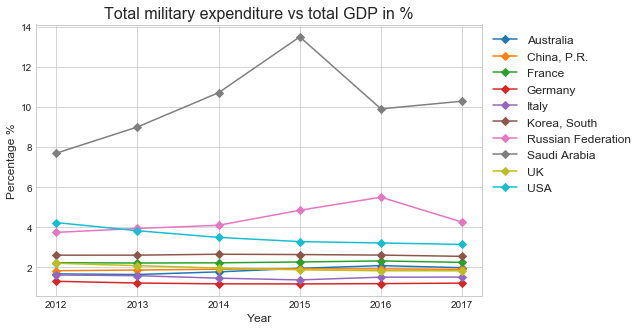

In [18]:
# plot line graph: share of military spending to GDP 
plt.figure(figsize=(8, 5))

for i in country:
    # use diamond as marker
    plt.plot(pms.loc[i,:], marker="D")
# set legend location and fontsize
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Total military expenditure vs total GDP in %", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage %", fontsize=12)
#plt.savefig("ms_gdp%.png", bbox_inches='tight') #save the plots to folder 
plt.show()

### Compare the overall military spending of the all 10 countries in absolute value

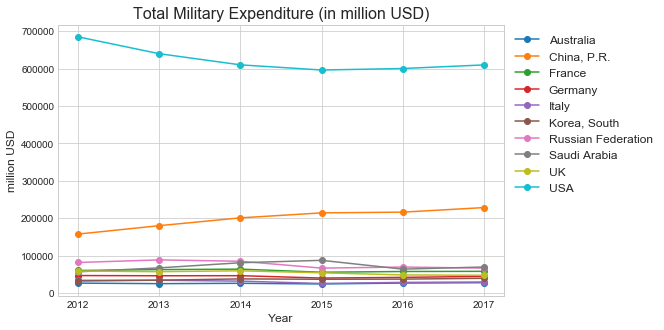

In [19]:
# plot line graph: military spending for 10 countries in absolute value 
plt.figure(figsize=(8, 5))

for i in country:
    plt.plot(ms.loc[i,:], marker="o")
    
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Total Military Expenditure (in million USD)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("million USD", fontsize=12)
#plt.savefig("ms.png", bbox_inches='tight') #save the plots to folder 
plt.show()

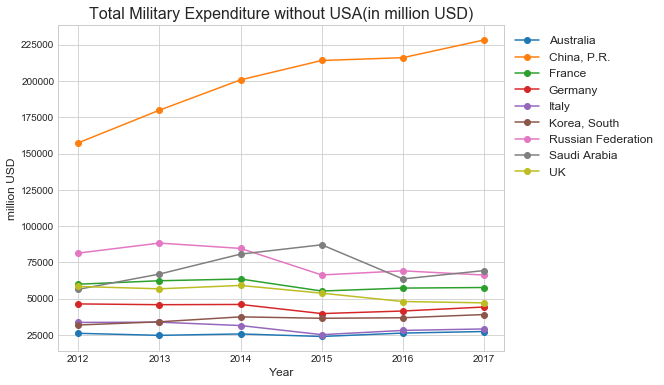

In [20]:
# plot line graph:military spending for 10 countries in absolute value exclude country "USA"
plt.figure(figsize=(8,6))

for i in country:
    # if country name is USA do nothing, else draw the graph.
    if i == "USA":
        pass
    else:
        plt.plot(ms.loc[i,:], marker="o")
    
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Total Military Expenditure without USA(in million USD)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("million USD", fontsize=12)
#plt.savefig("ms_no_us.png", bbox_inches='tight') #save the plots to folder 
plt.show()

### Compare the overall military spending of the all 10 countries in percentages

In [21]:
# calculate the sum of each column in military spending sheet.
ms_sum = ms.sum(axis=0)
# each row in ms divided by the ms_sum array to calculate the share of each country's military spending yearly
ms_div = ms.div(ms_sum, axis=1)*100
ms_div

,2012,2013,2014,2015,2016,2017
Country,,,,,,
Australia,2.1193,2.0134,2.0794,2.0059,2.2215,2.2531
"China, P.R.",12.7231,14.5886,16.1919,17.8600,18.1900,18.7246
France,4.8531,5.0621,5.1303,4.6167,4.8296,4.7396
Germany,3.7566,3.7250,3.7181,3.3212,3.5010,3.6369
Italy,2.7269,2.7487,2.5463,2.1101,2.3750,2.3986
"Korea, South",2.5829,2.7685,3.0285,3.0508,3.1099,3.2122
Russian Federation,6.5858,7.1656,6.8306,5.5408,5.8305,5.4423
Saudi Arabia,4.5672,5.4354,6.5133,7.2732,5.3613,5.6948
UK,4.7287,4.6116,4.7730,4.4933,4.0517,3.8718


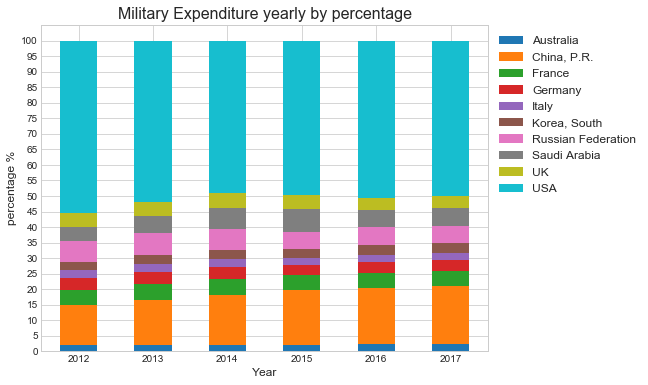

In [22]:
# plot stacked bar chart: each country's share of military spending by year    
ms_div.T.plot(figsize=(8, 6), kind="bar", stacked=True)
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Military Expenditure yearly by percentage", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("percentage %", fontsize=12)
# turn the x axis scale to 0 degree
plt.xticks(rotation=0, fontsize=10)
# set y axis scale from 0 to 105 with 5 added each time
plt.yticks(np.arange(0, 105, 5))
#plt.savefig("ms%.png", bbox_inches='tight') #save the plots to folder 
plt.show()

In [23]:
# def pie chart function
def plot_pie(year):
    # explode: each part's distance from the center 
    # autopct: percentage value format
    # pctdistance: percentage number distance from center
    # labeldistance: label distance from center 
    # startangle: start to draw the graph from which position
    plt.pie(ms[year], labels=list(ms.index), explode=(0,0.1,0,0,0,0,0.1,0.1,0,0.1), 
            autopct="%.1f%%", pctdistance=0.85, labeldistance=1.1, startangle=90)
    plt.title("Overall military spending year " + str(year) + " in %")

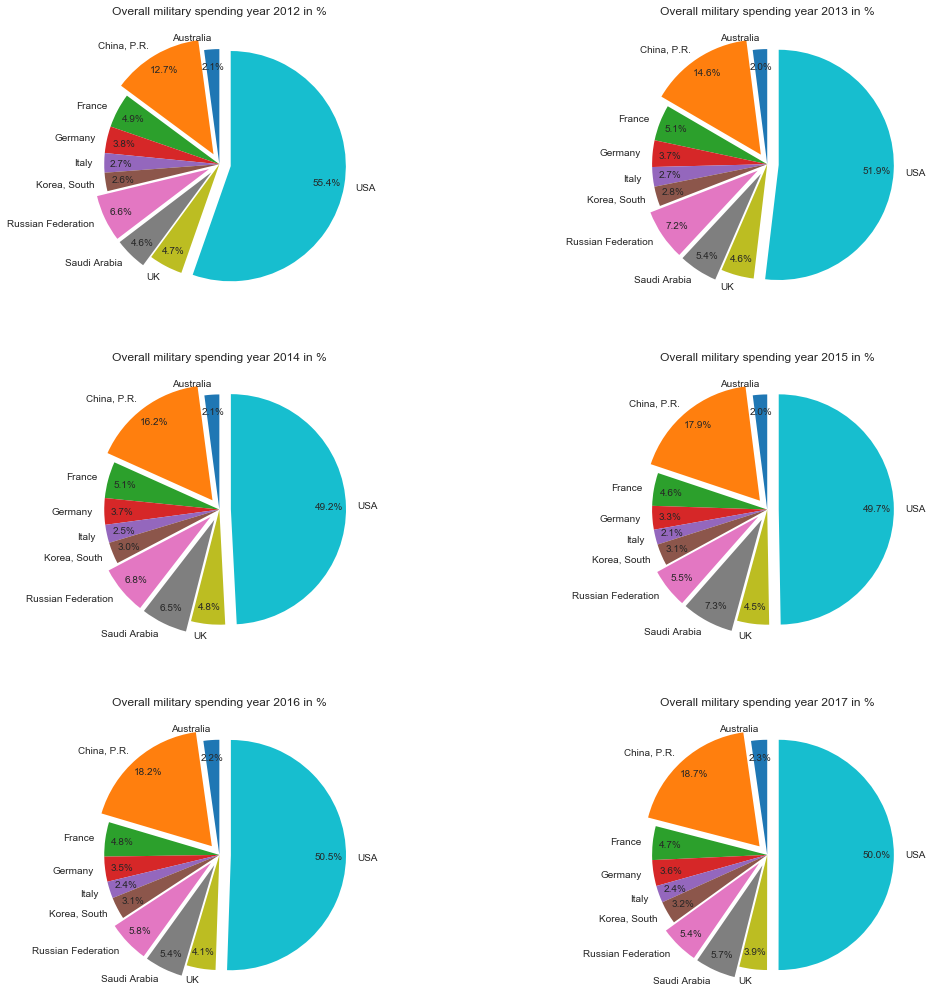

In [24]:
# subplot military spending yearly to compare in percentage
plt.figure(figsize=(18,18))
plt.subplot(321)
plot_pie(2012)
plt.subplot(322)
plot_pie(2013)
plt.subplot(323)
plot_pie(2014)
plt.subplot(324)
plot_pie(2015)
plt.subplot(325)
plot_pie(2016)
plt.subplot(326)
plot_pie(2017)
#plt.savefig("ms%_pie.png", bbox_inches='tight') #save the plots to folder 
plt.show()

### Compare the per person military spending to the per person GDP in absolute

In [25]:
# stack the ms_pc and gdp_pc dataframe 
stack_ms_pc = ms_pc.stack()
stack_gdp_pc = gdp_pc.stack()
# combine the two stacked dataframe by concat function
ms_gdp_pc = pd.concat([stack_ms_pc,stack_gdp_pc], axis=1)
ms_gdp_pc.columns = ["MS", "GDP"]
ms_gdp_pc.index.names = ["Country", "Year"]
ms_gdp_pc.head(8)

MS        GDP
Country     Year                     
Australia   2012 1148.7492 68381.2926
            2013 1072.3318 65008.2015
            2014 1098.3631 61660.9327
            2015 1010.3369 51588.5640
            2016 1093.5552 52251.9755
            2017 1123.1775 56461.1511
China, P.R. 2012  114.4492  6224.9235
            2013  130.0849  6947.7390

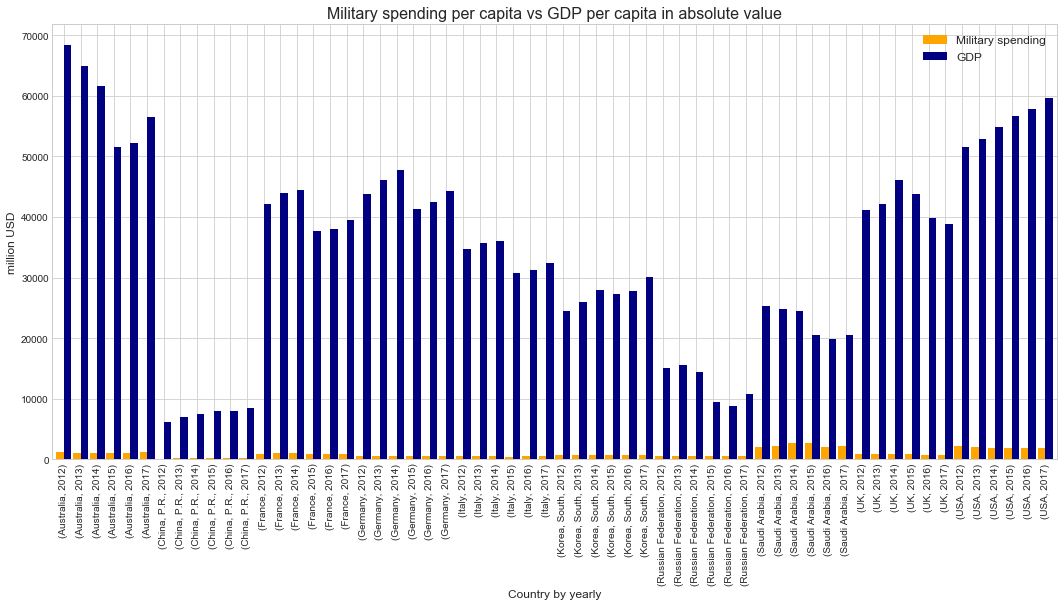

In [26]:
# plot bar chart: the camparison of military spending per person and GDP per person 
ms_gdp_pc.plot(figsize=(18, 8), kind="bar",color=("orange", "navy"), width=0.9)
plt.legend(["Military spending", "GDP"], bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Military spending per capita vs GDP per capita in absolute value", fontsize=16)
plt.xlabel("Country by yearly", fontsize=12)
plt.ylabel("million USD", fontsize=12)
#plt.savefig("ms_gdp_pc.png", bbox_inches='tight') #save the plots to folder 
plt.show()

In [27]:
# define function to plot the camparison of military spending per person and GDP per person by country
def per_capita_absolute(country):
    df = ms_gdp_pc.loc[country]
    df.plot(figsize=(12,5), kind="barh", color=("orange","navy"))
    plt.legend(["Military spending","GDP"], bbox_to_anchor=(1.25, 1), fontsize=12)
    plt.xlabel("current USD")
    plt.title("Military spending per capita vs GDP per capita yearly for " + str(country), fontsize=16)
    plt.xticks(np.arange(0, 70000, 5000)) 
    #plt.savefig("ms_gdp_pc_" + str(country) + ".png", bbox_inches="tight") #save the plots to folder 
    plt.show()  

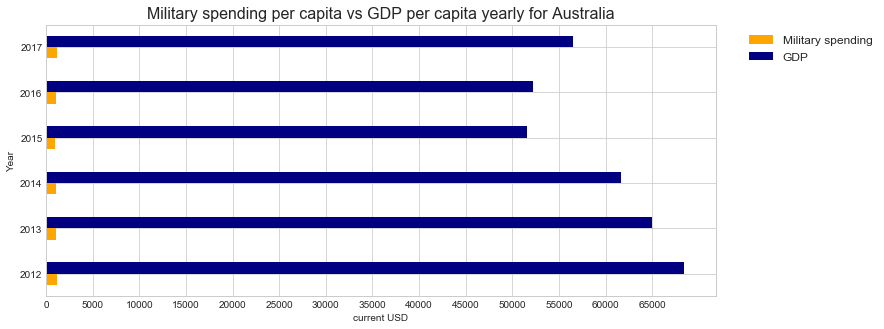

In [28]:
per_capita_absolute("Australia")

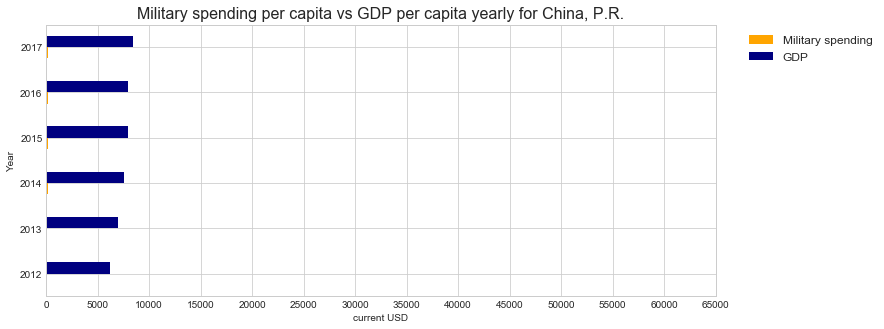

In [29]:
per_capita_absolute("China, P.R.")

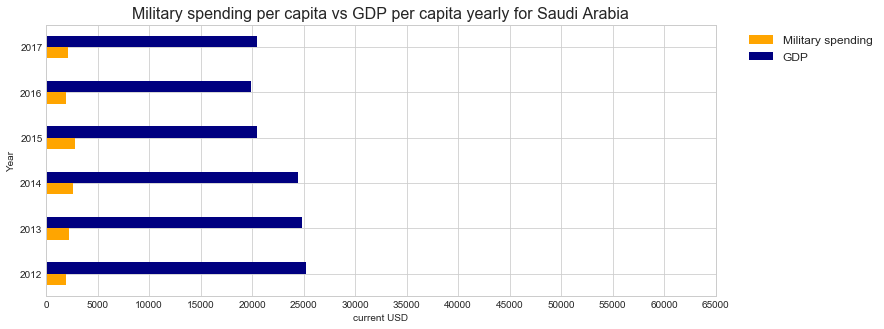

In [30]:
per_capita_absolute("Saudi Arabia")

### Compare the per person military spending to the per person GDP in percentage


In [31]:
# conduct the per person military spending to per person GDP in percentage by dividing the two data frame 
pct_pc = ms_pc/gdp_pc*100
pct_pc

,2012,2013,2014,2015,2016,2017
Country,,,,,,
Australia,1.6799,1.6495,1.7813,1.9585,2.0928,1.9893
"China, P.R.",1.8386,1.8723,1.9153,1.9349,1.9306,1.9088
France,2.2389,2.2224,2.2326,2.2742,2.3270,2.2552
Germany,1.3113,1.2240,1.1850,1.1795,1.1958,1.2201
Italy,1.6274,1.5908,1.4673,1.3805,1.5177,1.5223
"Korea, South",2.6130,2.6146,2.6608,2.6448,2.6183,2.5549
Russian Federation,3.7513,3.9441,4.1042,4.8513,5.5038,4.2625
Saudi Arabia,7.6977,9.0040,10.7136,13.4962,9.9065,10.2887
UK,2.2107,2.0909,1.9721,1.8826,1.8387,1.8348


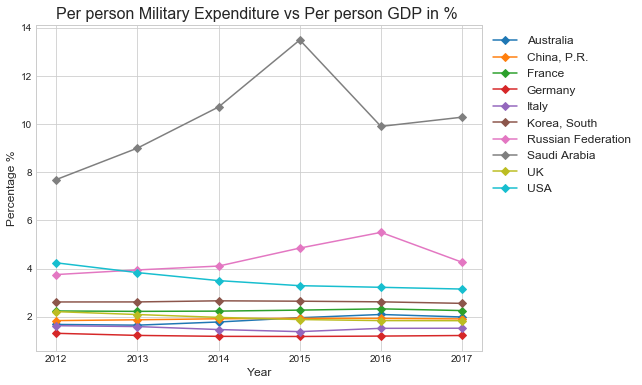

In [32]:
# plot line graph: percentage of per person military spending to per person GDP 
plt.figure(figsize=(8, 6))

for i in country:
    plt.plot(pct_pc.loc[i,:], marker="D")
    
plt.legend(country,bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Per person Military Expenditure vs Per person GDP in % ", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage %", fontsize=12)
#plt.savefig("ms_gdp_pc%.png", bbox_inches="tight") #save the plots to folder 
plt.show()

### The fastest growing countries in military spending in absolute

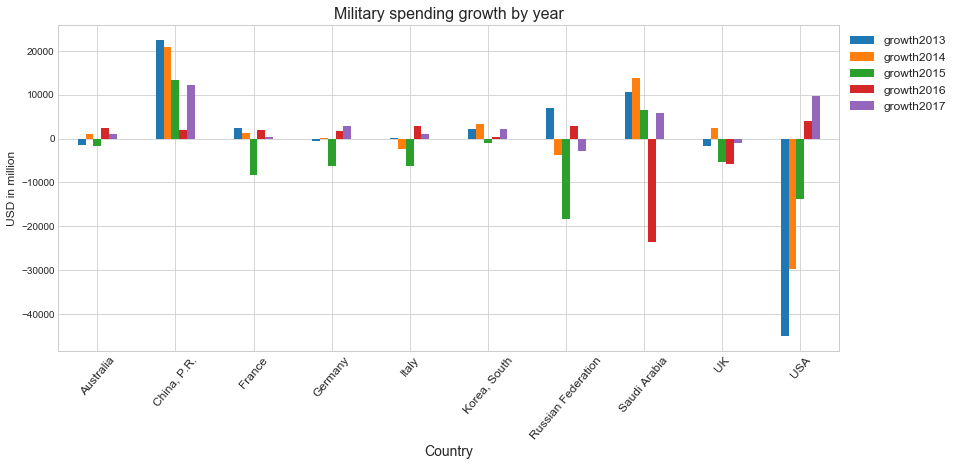

In [33]:
# define fucntion to calculate the yearly military spending growth 
def growth_ms(df):
    for year in range(2012, 2017,1):
        # add growth columns 
        df["growth"+ str(year+1)] = df[year+1] - df[year]
    df = df.iloc[:, 6:]
    
    # plot bar chart by country show yearly growth 
    df.plot(figsize=(14, 6), kind="bar")
    plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
    plt.title("Military spending growth by year", fontsize=16)
    plt.xlabel("Country", fontsize=14)
    plt.ylabel("USD in million", fontsize=12)
    plt.xticks(rotation=50, fontsize=12)
    #plt.savefig("growth.png", bbox_inches='tight') #save the plots to folder 
    plt.show()

ms_g = ms.copy()
growth_ms(ms_g)

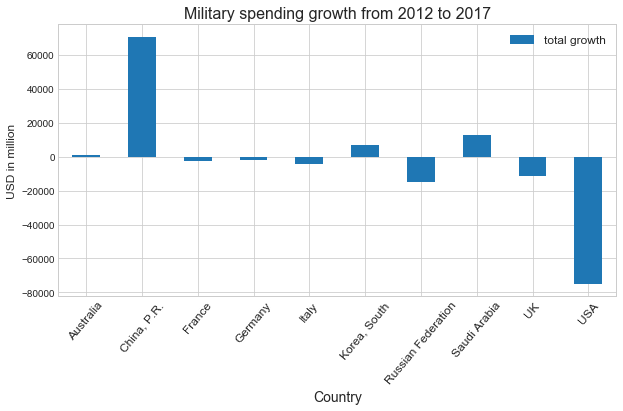

In [34]:
# define a function to calculate the total growth of military spending from 2012 to 2017 
def ms_total_growth(df):
    df = df.loc[:, [2017, 2012]]
    # calculate total growth
    df["total growth"] = df[2017] - df[2012]
    # delete 2012 and 2017 columns
    del df[2017]
    del df[2012]
    
    # plot bar chart of the growth from 2012 to 2017 
    df.plot.bar(figsize=(10,5))
    plt.legend(fontsize=12)
    plt.title("Military spending growth from 2012 to 2017", fontsize=16)
    plt.xlabel("Country", fontsize=14)
    plt.ylabel("USD in million", fontsize=12)
    plt.xticks(rotation=50, fontsize=12)
    #plt.savefig("netgrowth.png", bbox_inches="tight") #save the plots to folder 
    plt.show()
    
ms_total_growth(ms)

In [35]:
# calculate percentage change in military spending 
ms_growth_pct = ms.T.pct_change()*100
ms_growth_pct = ms_growth_pct.iloc[1:6,:]
ms_growth_pct

Country,Australia,"China, P.R.",France,Germany,Italy,"Korea, South",Russian Federation,Saudi Arabia,UK,USA
2013,-5.3070,14.2894,3.9676,-1.1627,0.4718,6.8381,8.4492,18.6239,-2.7932,-6.5826
2014,3.8608,11.6142,1.9169,0.3748,-6.8437,10.0059,-4.1384,20.5049,4.0820,-4.6568
2015,-6.7412,6.6348,-13.0026,-13.6437,-19.8838,-2.6138,-21.5803,7.9535,-8.9902,-2.2641
2016,9.7206,0.9053,3.6433,4.4381,11.5092,0.9945,4.2557,-26.9689,-10.6628,0.6713
2017,4.0912,5.6470,0.7178,6.6133,3.6537,6.0054,-4.2029,9.0157,-1.9241,1.6083


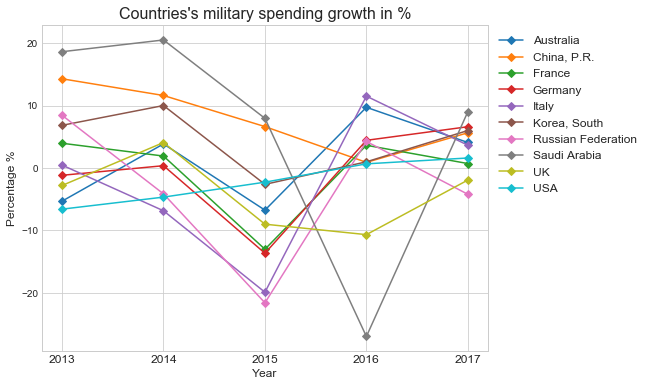

In [36]:
# plot line chart shows the yearly growth rate for each country in percentage
ms_growth_pct.plot(figsize =(8,6), marker="D")
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Countries's military spending growth in %", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage %", fontsize=12)
plt.xticks(list(ms_growth_pct.index), fontsize=12)
#plt.savefig("growth%.png", bbox_inches="tight") #save the plots to folder 
plt.show()

### Corelation between military spending and GDP

In [37]:
# Return ms and gdp to contiguous flattened array order by row-major 
ms_list = np.ravel(ms, order="C")
gdp_list = np.ravel(gdp, order="C")/100
# conduct new dataframe
ms_gdp = pd.DataFrame({'GDP':gdp_list,'MS':ms_list})
ms_gdp.head(6)

,GDP,MS
0,15605.8753,26216.5808
1,15049.8726,24825.2626
2,14474.6992,25783.7087
3,12277.8492,24045.5691
4,12606.2322,26382.9471
5,13805.0682,27462.3204


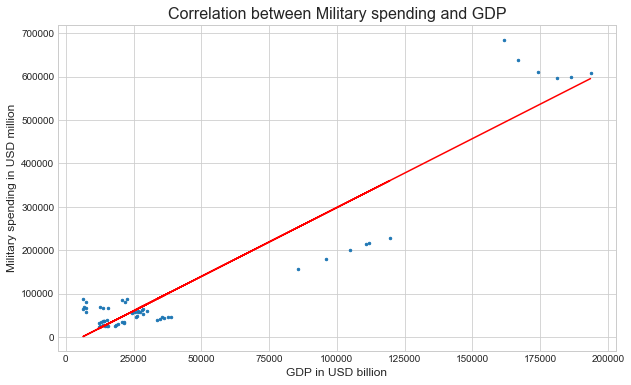

In [38]:
# plot scatter to show the correlation between military spending and GDP
plt.figure(figsize = (10,6))
x1 = ms_gdp["GDP"]
y1 = ms_gdp["MS"]
plt.scatter(x1, y1, s = 6)
# polynomial of degree 1, b and m cannot exchange
b1, m1 = polyfit(x1, y1, 1)
# m is slope and b is intersect with y axis
plt.plot(x1, m1 * x1 + b1, "-", color="red")
plt.title("Correlation between Military spending and GDP", fontsize=16)
plt.xlabel("GDP in USD billion", fontsize=12)
plt.ylabel("Military spending in USD million", fontsize=12)
#plt.savefig("corr.png") #save the plots to folder 
plt.show()

In [39]:
# Return ms_pc and gdp_pc to contiguous flattened array 
ms_pc_list = np.ravel(ms_pc, order="C")
gdp_pc_list = np.ravel(gdp_pc, order="C")/100
# conduct new dataframe 
ms_gdp_pc = pd.DataFrame({"GDP pp":gdp_pc_list,"MS pp":ms_pc_list})
ms_gdp_pc.head(6)

,GDP pp,MS pp
0,683.8129,1148.7492
1,650.0820,1072.3318
2,616.6093,1098.3631
3,515.8856,1010.3369
4,522.5198,1093.5552
5,564.6115,1123.1775


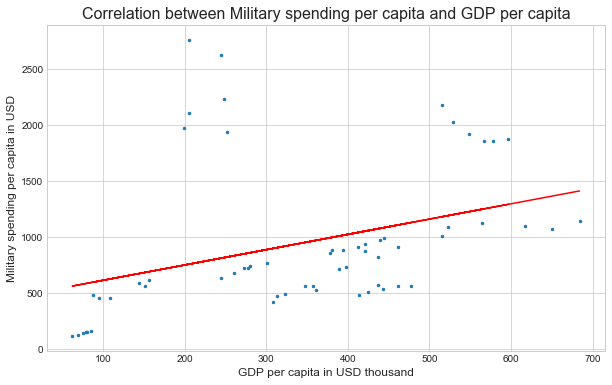

In [40]:
# plot scatter to show the correlation between military spending and GDP
plt.figure(figsize = (10,6))
x2 = ms_gdp_pc["GDP pp"]
y2 = ms_gdp_pc["MS pp"]
plt.scatter(x2, y2, s = 6)
# polynomial of degree 1, b and m cannot exchange
b2, m2 = polyfit(x2, y2, 1)
# m is slope and b is intersect with y axis
plt.plot(x2, m2 * x2 + b2, "-", color="red")
plt.title("Correlation between Military spending per capita and GDP per capita", fontsize=16)
plt.xlabel("GDP per capita in USD thousand", fontsize=12)
plt.ylabel("Military spending per capita in USD", fontsize=12)
#plt.savefig("corr_pp.png") #save the plots to folder 
plt.show()

In [41]:
# check the regression line slope and intersect 
print(b1, m1, b2, m2)

-19198.041329483287 3.1759751588418195 479.04038735568975 1.366969007205704
